In [2]:
import matplotlib.pyplot as plt
import numpy as np
import astropy
from iris_lmsalpy import extract_irisL2data
from astropy.io import fits
from scipy.io import readsav
from scipy.io import readsav
from helita.io import lp
from tqdm import tqdm
from scipy import ndimage
import matplotlib as mpl
import sunpy.cm as cm
# %matplotlib widget
# %matplotlib inline

In [3]:
#IRIS directories
iris_l2_dir ='/mn/stornext/d10/HDC2/iris/data/level2_decompressed/2017/05/25/20170525_073324_3633105426/'
SJI_filename=iris_l2_dir+'iris_l2_20170525_073324_3633105426_SJI_1400_t000.fits'
raster_filename_start = iris_l2_dir+'iris_l2_20170525_073324_3633105426_raster_t000_r00425.fits'
iris_l3_dir= '/mn/stornext/d11/lapalma/reduc/2017/2017-05-25/CHROMIS/crispex/09:12:00/iris_l3/'

In [4]:
# SST + AIA directories
dpath = '/mn/stornext/d11/lapalma/reduc/2017/2017-05-25/CHROMIS/crispex/09:12:00/'
dpath_timesteps ='/mn/stornext/d11/lapalma/reduc/2017/2017-05-25/CHROMIS/calib_tseries/'
dpath_SDO = '/mn/stornext/d11/lapalma/reduc/2017/2017-05-25/CHROMIS/crispex/09:12:00/sdo/sdo2sst/'

In [7]:
lines = extract_irisL2data.show_lines(raster_filename_start)
iris_sji = extract_irisL2data.load(SJI_filename)
iris_raster = extract_irisL2data.load(raster_filename_start, window_info = lines[[3,7]])


Extracting information from file /mn/stornext/d10/HDC2/iris/data/level2_decompressed/2017/05/25/20170525_073324_3633105426/iris_l2_20170525_073324_3633105426_raster_t000_r00425.fits... 

Available data with size Y x X x Wavelength are stored in windows labeled as:

--------------------------------------------------------------------
Index --- Window label --- Y x X x WL --- Spectral range [AA] (band)
--------------------------------------------------------------------
  0 	 C II 1336    	   207x8x181 	   1332.68 - 1337.35  (FUV)
  1 	 Fe XII 1349  	   207x8x117 	   1347.66 - 1350.67  (FUV)
  2 	 O I 1356     	   207x8x165 	   1352.20 - 1356.46  (FUV)
  3 	 Si IV 1394   	   207x8x198 	   1390.87 - 1395.88  (FUV)
  4 	 Si IV 1403   	   207x8x294 	   1398.58 - 1406.03  (FUV)
  5 	 2832         	   207x8x52 	   2831.70 - 2834.29  (NUV)
  6 	 2814         	   207x8x68 	   2813.01 - 2816.42  (NUV)
  7 	 Mg II k 2796 	   207x8x260 	   2793.46 - 2806.64  (NUV)
--------------------------------

In [8]:
xdata_Si = iris_raster.raster['Si IV 1394'].wl
xdata_Mg = iris_raster.raster['Mg II k 2796'].wl

In [9]:
wave_H= readsav(dpath+'spectfile.6563.idlsave')
wave_Ca =readsav(dpath+'spectfile.3950.idlsave')
wave_H=wave_H['spect_pos']
wave_Ca=wave_Ca['spect_pos']
wave_H_dopp = 3e5*((wave_H-6563.)/6563.0)
wave_Si_dopp = 3e5*((xdata_Si[103:103+22]-1393.755)/1393.755)
wave_Ca_dopp = ((wave_Ca[:41]-3933.7)/3933.7)*3e5
wave_Mg_dopp = 3e5*((xdata_Mg[40:40+30]-2796.25)/2796.25)

In [10]:
l3_data = fits.getdata(iris_l3_dir+'iris_l3_20170525_073324_3633105426_t000_FeXII1349_OI1356_SiIV1394_MgIIk2796_im.fits', ext=0)

# SDO data

In [137]:
cmap1 = 'sdoaia304'
cmap2 = 'sdoaia171'
#image_file = get_pkg_data_filename(dpath_SDO+'aia_304_al.fits')
aia_304 = np.swapaxes(fits.getdata(dpath_SDO+'aia_304_al.fits',ext=0),0,2)
aia_171 =(np.swapaxes(fits.getdata(dpath_SDO+'aia_171_al.fits',ext=0),0,2))
aia_131 = (np.swapaxes(fits.getdata(dpath_SDO+'aia_131_al.fits',ext=0),0,2))
aia_304.shape

(1518, 1641, 425)

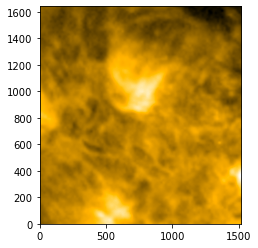

In [54]:
plt.imshow(aia_171[:,:,129].T,origin='lower',cmap=cmap2)

In [67]:
test_171 = aia_171[:,:,130].T
difference = test_171 - aia_171[:,:,129].T

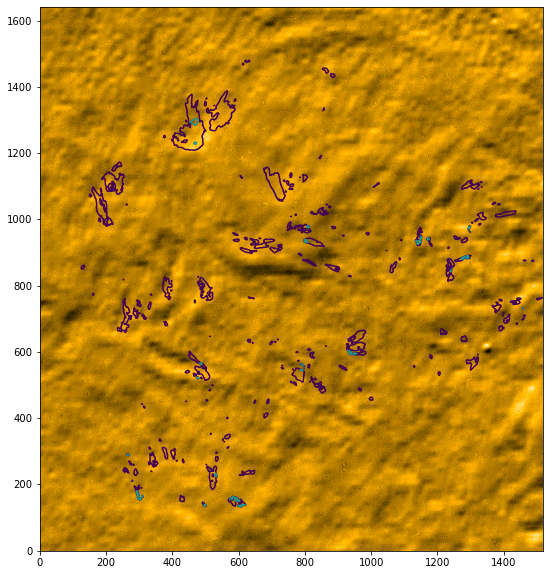

In [70]:
plt.figure(figsize=(10,10))
plt.imshow(difference,origin='lower',cmap=cmap2)
plt.contour(cube_drre[:,:,130].T,origin='lower',levels=1)

In [59]:
test_131 = aia_131[:,:,130].T
difference = test_131 - aia_131[:,:,129].T

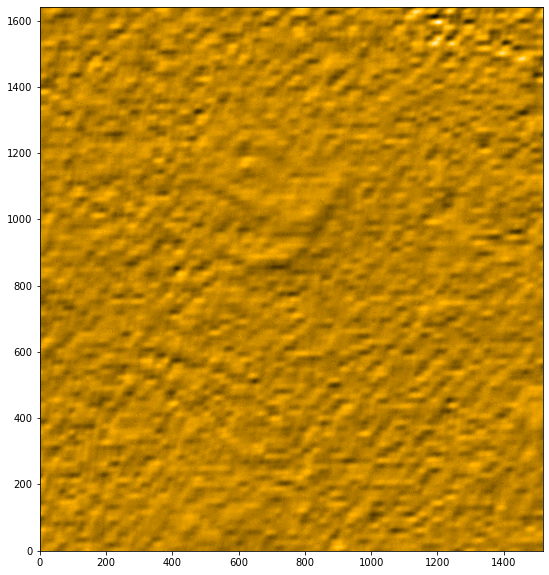

In [60]:
plt.figure(figsize=(10,10))
plt.imshow(difference,origin='lower',cmap=cmap2)

# SST+IRIS

In [61]:
hdrH_im =lp.getheader(dpath+'crispex_6563_08:05:00_aligned_3950_2017-05-25T09:12:00_scans=0-424_rotated2iris.icube')
hdrH_sp = lp.getheader(dpath+'crispex_6563_08:05:00_aligned_3950_2017-05-25T09:12:00_scans=0-424_rotated2iris_sp.icube')
dimH_im = hdrH_im[0]
dimH_sp = hdrH_sp[0]
cubeH = lp.getdata(dpath+'crispex_6563_08:05:00_aligned_3950_2017-05-25T09:12:00_scans=0-424_rotated2iris.icube')
cubeH = np.reshape(cubeH,[dimH_im[0],dimH_im[1],dimH_sp[1],dimH_sp[0]])
time_sst = readsav(dpath_timesteps+'tseries_3950_2017-05-25T09:12:00_scans=0-424_calib.sav')
time_sst=time_sst['time']
hdr_Mag = lp.getheader(dpath+'Blos_6302_08:05:00_aligned_3950_2017-05-25T09:12:00_scans=0-424_rotated2iris.icube')
dim_Mag = hdr_Mag[0]
cube_Mag = lp.getdata(dpath+'Blos_6302_08:05:00_aligned_3950_2017-05-25T09:12:00_scans=0-424_rotated2iris.icube')
cube_Mag = np.reshape(cube_Mag,[dim_Mag[0],dim_Mag[1],dim_Mag[2]])
cube_Mag=np.swapaxes(cube_Mag,0,1)
h_alpha=np.swapaxes(cubeH,0,1)

hdrCa_im = lp.getheader(dpath+'crispex_3950_2017-05-25T09:12:00_scans=0-424_time-corrected_rotated2iris.fcube')
hdrCa_sp = lp.getheader(dpath+'crispex_3950_2017-05-25T09:12:00_scans=0-424_time-corrected_rotated2iris_sp.fcube')
dimCa_im = hdrCa_im[0]#Image dimensions.
dimCa_sp = hdrCa_sp[0]#La Palma SP cube dimensions.
cubeCa = lp.getdata(dpath+'crispex_3950_2017-05-25T09:12:00_scans=0-424_time-corrected_rotated2iris.fcube')
cubeCa = np.reshape(cubeCa,[dimCa_im[0],dimCa_im[1],dimCa_sp[1],dimCa_sp[0]])
Ca_k = np.swapaxes(cubeCa,0,1)

hdr_Si = lp.getheader(dpath+'IRIS_Si_SJI_1400_07:33:00_intblown_aligned_3950_2017-05-25T09:12:00_rotated.fcube')
dim_Si = hdr_Si[0]
cube_Si = lp.getdata(dpath+'IRIS_Si_SJI_1400_07:33:00_intblown_aligned_3950_2017-05-25T09:12:00_rotated.fcube')
#cube_Si = np.swapaxes(cube_Si,0,1)

hdr_drre = lp.getheader(dpath+'IRIS_Si_RRE_1400_07:33:00_intblown_aligned_3950_2017-05-25T09:12:00_rotated.fcube')
dim_drre = hdr_drre[0]
cube_drre = lp.getdata(dpath+'IRIS_Si_RRE_1400_07:33:00_intblown_aligned_3950_2017-05-25T09:12:00_rotated.fcube')


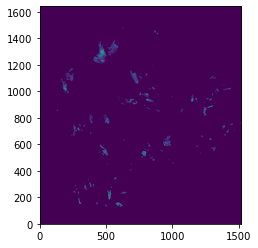

In [64]:
plt.imshow(cube_drre[:,:,130].T, origin='lower')

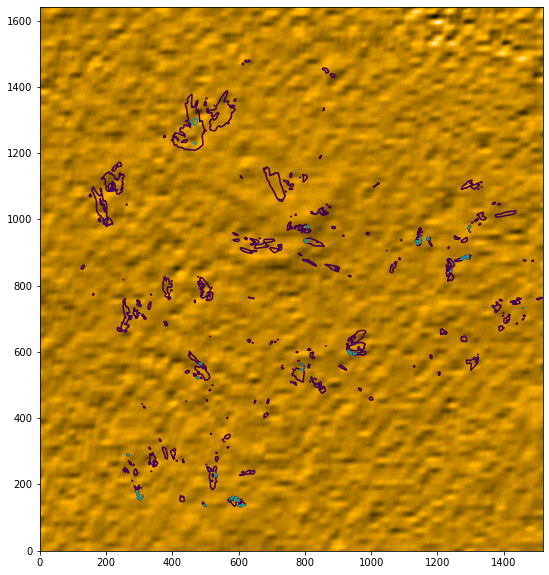

In [66]:
plt.figure(figsize=(10,10))
plt.imshow(difference,origin='lower',cmap=cmap2)
plt.contour(cube_drre[:,:,130].T,origin='lower',levels=1)

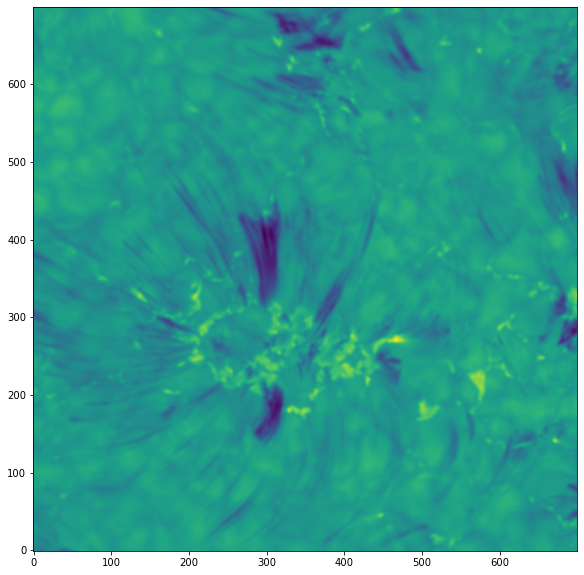

In [90]:
plt.figure(figsize=(10,10))
plt.imshow(ndimage.rotate(cubeH[500:1200,600:1300,82,25].T,-90),origin='lower')


In [100]:
rot_drre_H = ndimage.rotate(cubeH[500:1200,600:1300,80,25].T,-90)
rot_drre_Si =ndimage.rotate(cube_Si[500:1200,600:1300,80].T,-90)

In [105]:
rot_drre_H[300:550,250:350].shape

(250, 100)

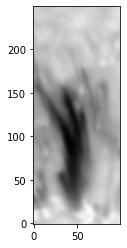

In [103]:
plt.imshow(rot_drre_H[300:550,250:350],origin='lower',cmap='gray')

In [228]:
rot_drre_H = np.zeros((250,100,23))
rot_drre_304 = np.zeros((250,100,23))
rot_drre_171 = np.zeros((250,100,23))
rot_drre_Si = np.zeros((250,100,23))
rot_drre_131 = np.zeros((250,100,23))
for scans in tqdm(range(23)):
    try_drre = ndimage.rotate(cubeH[500:1200,600:1300,68+scans,25].T,-90)
    rot_drre_H[:,:,scans] = try_drre[300:550,250:350]
    try_drre = ndimage.rotate((cube_Si[500:1200,600:1300,68+scans]-np.mean(cube_Si[500:1200,600:1300,68:91],axis=2)).T,-90)
    rot_drre_Si[:,:,scans] = try_drre[300:550,250:350]
    try_drre = ndimage.rotate((aia_171[500:1200,600:1300,68+scans]-np.mean(aia_171[500:1200,600:1300,68:91],axis=2)).T,-90)
    rot_drre_171[:,:,scans] = try_drre[300:550,250:350]
    try_drre = ndimage.rotate((aia_304[500:1200,600:1300,68+scans]-np.mean(aia_304[500:1200,600:1300,68:91],axis=2)).T,-90)
    rot_drre_304[:,:,scans] = try_drre[300:550,250:350]
    try_drre = ndimage.rotate((aia_131[500:1200,600:1300,68+scans]-np.mean(aia_131[500:1200,600:1300,68:91],axis=2)).T,-90)
    rot_drre_131[:,:,scans] = try_drre[300:550,250:350]

100%|██████████| 23/23 [00:16<00:00,  1.39it/s]


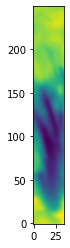

In [270]:
plt.imshow(rot_drre_H[:,25:60,12],origin='lower')

In [316]:
x_t_H = np.mean(rot_drre_H[:,20:60,:],axis=1)
x_t_Si = np.mean(rot_drre_Si[:,35:60,:],axis=1)
x_t_171 = np.mean(rot_drre_171[:,20:60,:],axis=1)
x_t_304 = np.mean(rot_drre_304[:,40:60,:],axis=1)
x_t_131 = np.mean(rot_drre_131[:,20:60,:],axis=1)

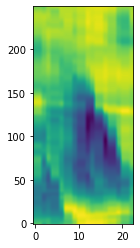

In [308]:
plt.imshow(x_t_H, origin='lower',aspect=0.2)

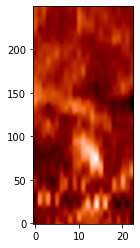

In [266]:
plt.imshow(x_t_Si, origin='lower',aspect=0.2,cmap='irissjiFUV')

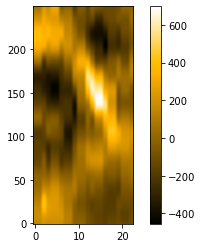

In [261]:
plt.imshow(x_t_171[:,:], origin='lower',aspect=0.2,cmap=cmap2)
plt.colorbar()

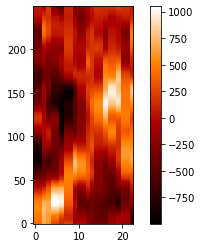

In [262]:
plt.imshow(x_t_304, origin='lower',aspect=0.2,cmap=cmap1,interpolation='nearest')
plt.colorbar()

In [175]:
np.mean(aia_171[500:1200,600:1300,68:91],axis=2).shape

(700, 700)

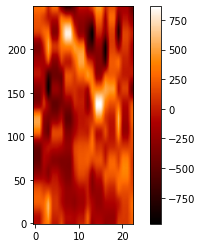

In [294]:
plt.imshow((x_t_131), origin='lower',aspect=0.2,cmap=cmap1,interpolation='bilinear')
plt.colorbar()

/astro/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:50: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_innches" which is no longer supported as of 3.3 and will become an error two minor releases later


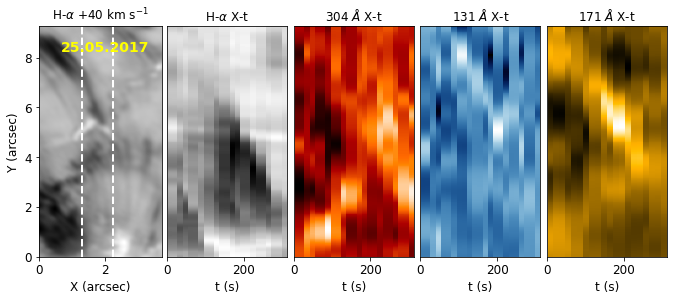

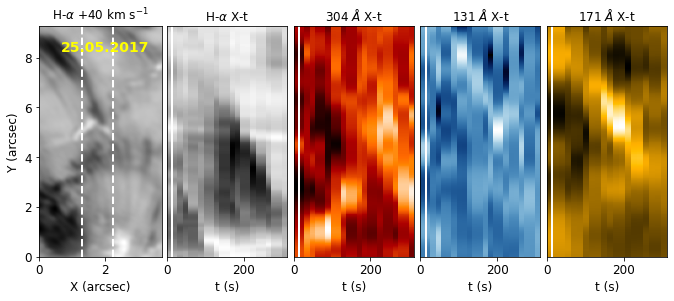

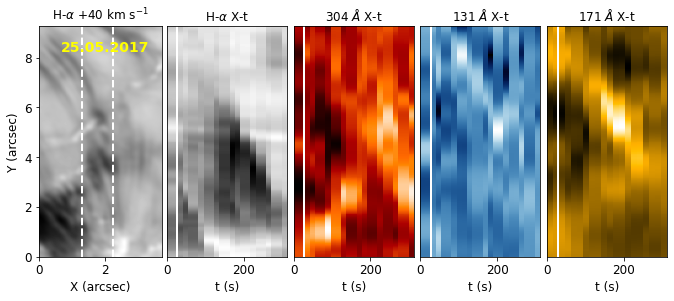

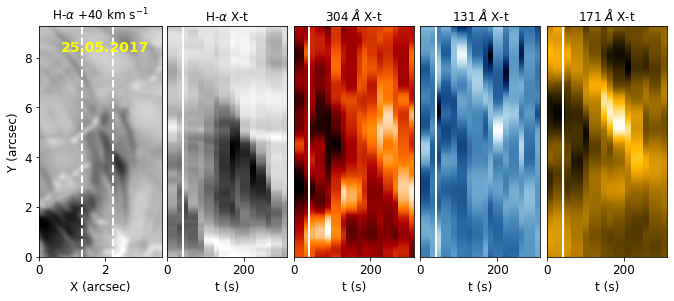

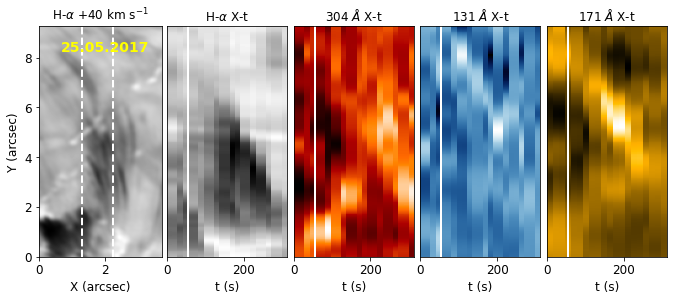

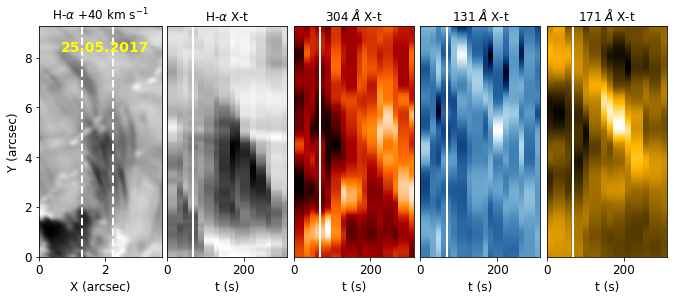

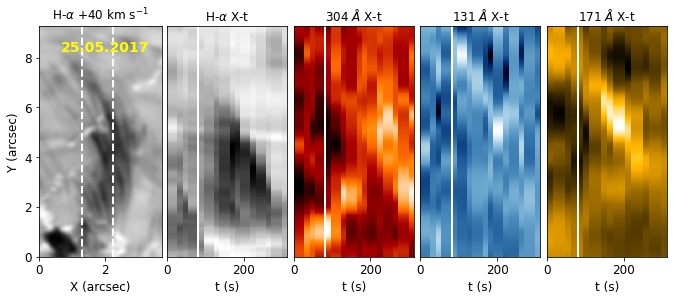

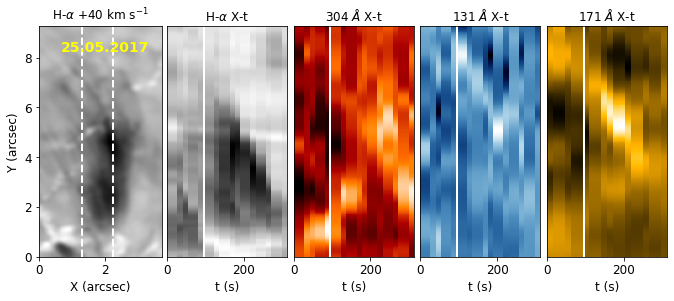

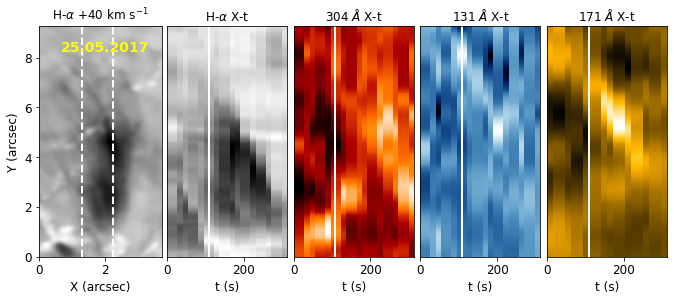

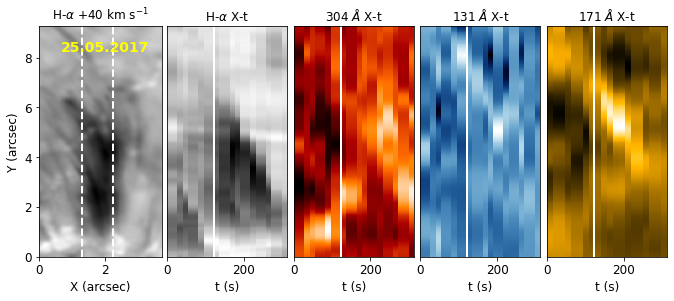

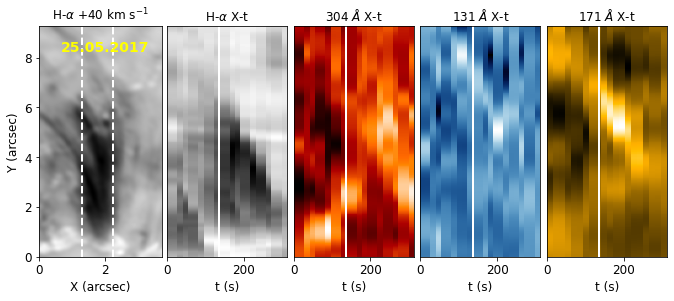

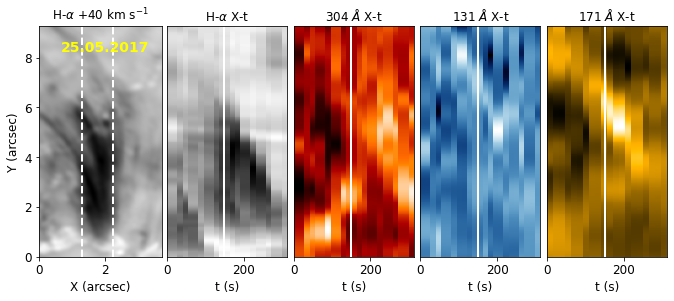

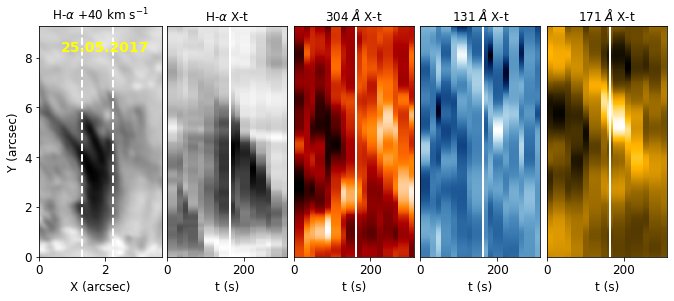

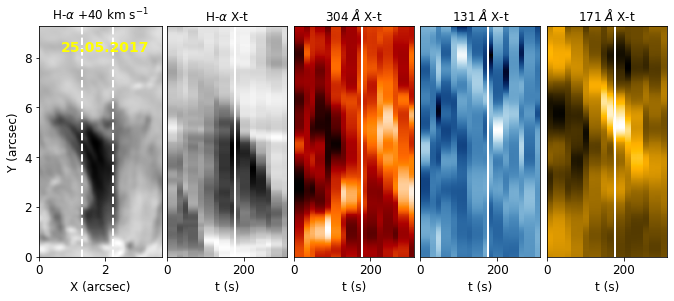

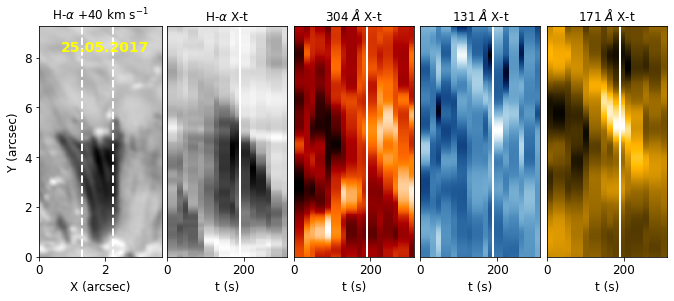

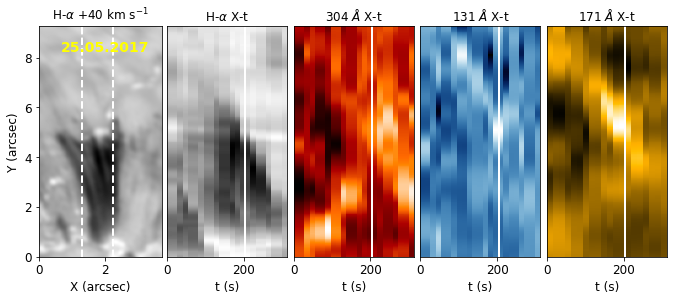

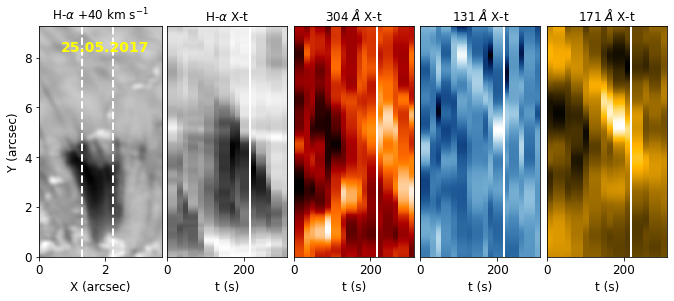

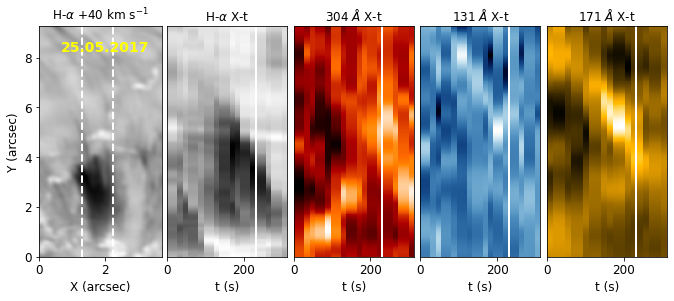

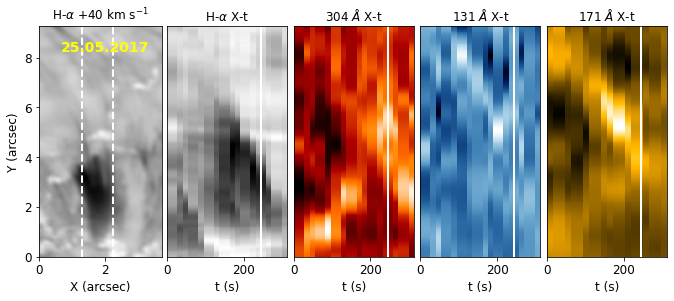

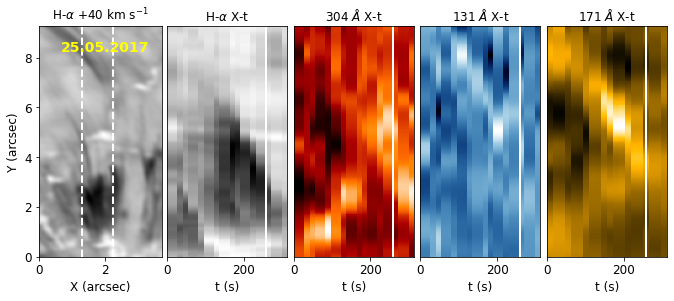

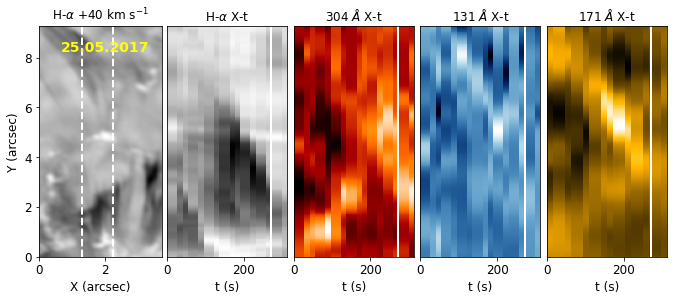

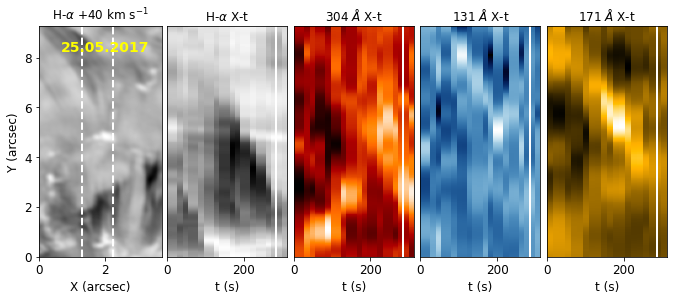

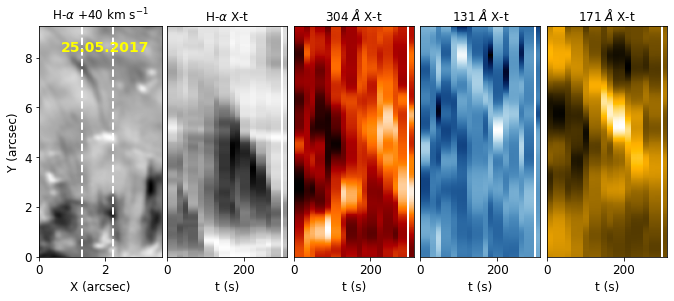

In [368]:
for scan in range(23):
    fig, axs =plt.subplots(1,5,figsize=(11,4),facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = 0.0,wspace=0.0,left=0.1,right=0.9,top=0.9,bottom=0.1)
    axs=axs.ravel()
    #major_yticks=[0,0.5,1.,1.5,]
    #major_xticks=[0,0.5,1.,1.5,2.,2.5]
    #major_x_time=[0,50,100,150]
    axs[0].imshow(rot_drre_H[:,:,scan],origin='lower',cmap='gray',extent=[0,100*0.037,0,250*0.037],aspect=0.75)
    # axs[0].set_yticks(major_yticks)
    # axs[0].set_xticks(major_xticks)
    axs[0].set_title(r'H-$\alpha$ +40 km s$^{-1}$')
    axs[0].axvline(x=35*0.037,color='white',linestyle='dashed',linewidth=2)
    axs[0].axvline(x=60*0.037,color='white',linestyle='dashed',linewidth=2)
    axs[0].set_xlabel('X (arcsec)',fontsize=12)
    axs[0].set_ylabel('Y (arcsec)',fontsize=12)
    axs[0].tick_params(axis='both', which='major', labelsize=12)
    axs[0].text(0.65,8.25,'25.05.2017',color='yellow',fontsize=14,weight='bold')
    axs[1].imshow(x_t_H,origin='lower',aspect=65,extent=[0,13.6*23,0,250*0.037],cmap='gray',interpolation='nearest')
    #axs[1].set_xticks([])
    axs[1].set_yticks([])
    axs[1].set_title(r'H-$\alpha$ X-t')
    axs[1].axvline(x=scan*13.6,color='white',linewidth=2)
    axs[1].set_xlabel('t (s)',fontsize=12)
    axs[1].tick_params(axis='both', which='major', labelsize=12)
    
    axs[2].imshow(x_t_304,origin='lower',cmap='sdoaia304',aspect=65,extent=[0,13.6*23,0,250*0.037],interpolation='nearest')
    #axs[2].set_xticks([])
    axs[2].set_yticks([])
    axs[2].axvline(x=scan*13.6,color='white',linewidth=2)
    axs[2].set_title(r'304 $\AA$ X-t')
    axs[2].set_xlabel('t (s)',fontsize=12)
    axs[2].tick_params(axis='both', which='major', labelsize=12)

    axs[3].imshow(x_t_131,origin='lower',aspect=65,extent=[0,13.6*23,0,250*0.037],cmap='sdoaia335',interpolation='nearest')
    #axs[3].set_xticks([])
    axs[3].set_yticks([])
    axs[3].axvline(x=scan*13.6,color='white',linewidth=2)
    axs[3].set_title(r'131 $\AA$ X-t')
    axs[3].set_xlabel('t (s)',fontsize=12)
    axs[3].tick_params(axis='both', which='major', labelsize=12)

    axs[4].imshow(x_t_171[:,3:],origin='lower',cmap='sdoaia171',aspect=65,extent=[0,13.6*23,0,250*0.037],interpolation='nearest')
    #axs[7].set_xticks([])
    axs[4].set_yticks([])
    #axs[4].set_xticks(major_x_time)
    axs[4].set_xlabel('t (s)',fontsize=12)
    axs[4].axvline(x=scan*13.6,color='white',linewidth=2)
    axs[4].set_title(r'171 $\AA$ X-t',fontsize=12)
    axs[4].tick_params(axis='both', which='major', labelsize=12)
    plt.savefig('/mn/stornext/d9/souvikb/paper5_results/OBS_movie/DRRE-dataset1-'+str(scan)+'.png',bbox_inches = 'tight',pad_innches=0.1)
    plt.show()

/astro/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_innches" which is no longer supported as of 3.3 and will become an error two minor releases later


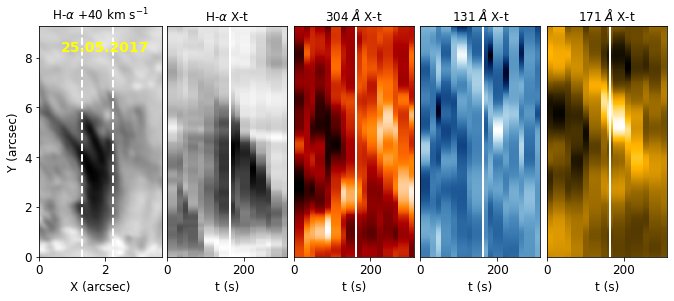

In [369]:
##~~~~~~~Plotting for one instance for the paper~~~~~~~~~~
scan =12
fig, axs =plt.subplots(1,5,figsize=(11,4),facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.0,wspace=0.0,left=0.1,right=0.9,top=0.9,bottom=0.1)
axs=axs.ravel()
#major_yticks=[0,0.5,1.,1.5,]
#major_xticks=[0,0.5,1.,1.5,2.,2.5]
#major_x_time=[0,50,100,150]
axs[0].imshow(rot_drre_H[:,:,scan],origin='lower',cmap='gray',extent=[0,100*0.037,0,250*0.037],aspect=0.75)
# axs[0].set_yticks(major_yticks)
# axs[0].set_xticks(major_xticks)
axs[0].set_title(r'H-$\alpha$ +40 km s$^{-1}$')
axs[0].axvline(x=35*0.037,color='white',linestyle='dashed',linewidth=2)
axs[0].axvline(x=60*0.037,color='white',linestyle='dashed',linewidth=2)
axs[0].set_xlabel('X (arcsec)',fontsize=12)
axs[0].set_ylabel('Y (arcsec)',fontsize=12)
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].text(0.65,8.25,'25.05.2017',color='yellow',fontsize=14,weight='bold')
axs[1].imshow(x_t_H,origin='lower',aspect=65,extent=[0,13.6*23,0,250*0.037],cmap='gray',interpolation='nearest')
#axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_title(r'H-$\alpha$ X-t')
axs[1].axvline(x=scan*13.6,color='white',linewidth=2)
axs[1].set_xlabel('t (s)',fontsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)

axs[2].imshow(x_t_304,origin='lower',cmap='sdoaia304',aspect=65,extent=[0,13.6*23,0,250*0.037],interpolation='nearest')
#axs[2].set_xticks([])
axs[2].set_yticks([])
axs[2].axvline(x=scan*13.6,color='white',linewidth=2)
axs[2].set_title(r'304 $\AA$ X-t')
axs[2].set_xlabel('t (s)',fontsize=12)
axs[2].tick_params(axis='both', which='major', labelsize=12)

axs[3].imshow(x_t_131,origin='lower',aspect=65,extent=[0,13.6*23,0,250*0.037],cmap='sdoaia335',interpolation='nearest')
#axs[3].set_xticks([])
axs[3].set_yticks([])
axs[3].axvline(x=scan*13.6,color='white',linewidth=2)
axs[3].set_title(r'131 $\AA$ X-t')
axs[3].set_xlabel('t (s)',fontsize=12)
axs[3].tick_params(axis='both', which='major', labelsize=12)

axs[4].imshow(x_t_171[:,3:],origin='lower',cmap='sdoaia171',aspect=65,extent=[0,13.6*23,0,250*0.037],interpolation='nearest')
#axs[7].set_xticks([])
axs[4].set_yticks([])
#axs[4].set_xticks(major_x_time)
axs[4].set_xlabel('t (s)',fontsize=12)
axs[4].axvline(x=scan*13.6,color='white',linewidth=2)
axs[4].set_title(r'171 $\AA$ X-t',fontsize=12)
axs[4].tick_params(axis='both', which='major', labelsize=12)
plt.savefig('/mn/stornext/d9/souvikb/paper5_results/OBS_movie/DRRE-dataset1-'+str(scan)+'.pdf',bbox_inches = 'tight',pad_innches=0.1,dpi=500)
plt.show()